In [1]:
from qiskit import QuantumCircuit,execute,Aer
import numpy as np

import random
import math

In [2]:
# Step0: Alice and Bob preshare two keys K1, K2, and Hash function based on K2

def random_01str(list1,num):
    for i in range(num):
        list1.append(random.randint(0,1))
        
n=50
m=30
        
K1=[]
random_01str(K1,n+m)
print("K1 :",K1)

K2=[]
random_01str(K2,m)
print("K2 :",K2)


# int(math.pow(2,m))

# binary to decimal : int("110",2) = 6
# decimal to binary : np.binary_repr(6,m) = 110

# list element to string : list1=[0,1,0,1,1]  str1=f'{list1[0]}'

# python function : hash()

def Hash(listSK,listK2,listHashSK):
    SK_part1=""
    SK_part2=""
    for i in range(n):
        if i <= n//2:
            SK_part1+=f'{listSK[i]}'
        else:
            SK_part2+=f'{listSK[i]}'
            
    K2_part1=""
    K2_part2=""
    for i in range(m):
        if i <= m//2:
            K2_part1+=f'{listK2[i]}'
        else:
            K2_part2+=f'{listK2[i]}'
            
    hash_value=((int(SK_part1,2))*(int(K2_part1,2))*99 + (int(SK_part2,2))*(int(K2_part2,2))*9)%(int(math.pow(2,m)))
    str_hash_value = np.binary_repr(hash_value,m)
    
    for i in range(len(str_hash_value)):
        listHashSK.append(int(str_hash_value[i]))
    

K1 : [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
K2 : [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0]


In [3]:
# Step1: Alice prepares SK||Hash(SK) --> SA

SK=[]
random_01str(SK,n)
print("SK :",SK)

HashSK=[]
Hash(SK,K2,HashSK)
print("HashSK :",HashSK)

SA=[]
SA.extend(SK)
SA.extend(HashSK)
print("SA :",SA)

SK : [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
HashSK : [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]
SA : [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]


SD       : [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
SD_basis : [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
SD SA SD SA SD SA SD SA SA SD SD SA SA SD SD SA SA SD SD SA SD SA SA SD SD SA SA SD SA SD SD SA SD SA SD SA SA SD SD SA SD SA SA SD SA SD SA SD SD SA SD SA SA SD SD SA SD SA SA SD SA SD SA SD SA SD SA SD SA SD SD SA SD SA SA SD SA SD SA SD SA SD SD SA SD SA SA SD SA SD SD SA SA SD SA SD SD SA SD SA SA SD SD SA SA SD SA SD SA SD SD SA SD SA SD SA SD SA SA SD SA SD SD SA SD SA SD SA SD SA SD SA SA SD SA SD SA SD SD SA SA SD SA SD SA SD SA SD SD SA SA SD SD SA SD SA SA SD SA SD 

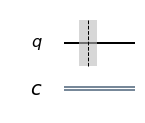

In [4]:
# Step2: Alice inserts random SD into SA based on K1
#        SA: |0> (0) or |1> (1)     SD: |0> |+> (0) or |1> |-> (1)   ==> QA

SD=[]
random_01str(SD,n+m)
print("SD       :",SD)

SD_basis=[]
random_01str(SD_basis,n+m)
print("SD_basis :",SD_basis)

circ0 = QuantumCircuit(1,1)  # |0>
circ0.barrier(0)

circ1 = QuantumCircuit(1,1)  # |1>
circ1.x(0)
circ1.barrier(0)

circ2 = QuantumCircuit(1,1)  # |+>
circ2.h(0)
circ2.barrier(0)

circ3 = QuantumCircuit(1,1)  # |->
circ3.x(0)
circ3.h(0)
circ3.barrier(0)

#circ3.draw(output='mpl')
qubit_circ = [circ0,circ1,circ2,circ3]


def generate_circuits_01ZX(list_element01,list_elementZX,list_circuits):
    if not list_element01 and not list_elementZX :
        list_circuits.append(circ0)
    elif list_element01 and not list_elementZX :
        list_circuits.append(circ1)
    elif not list_element01 and list_elementZX :
        list_circuits.append(circ2)
    else :
        list_circuits.append(circ3)
    
def generate_circuits_01(list_element01,list_circuits):
    if not list_element01 :
        list_circuits.append(circ0)
    else :
        list_circuits.append(circ1)


Alice_step2_circuits = [] # QA

for i in range(n+m):
    if not K1[i]: # SD SA
        print("SD SA ",end="")
        generate_circuits_01ZX(SD[i],SD_basis[i],Alice_step2_circuits)
        generate_circuits_01(SA[i],Alice_step2_circuits)
    else: # SA SD
        print("SA SD ",end="")
        generate_circuits_01(SA[i],Alice_step2_circuits)
        generate_circuits_01ZX(SD[i],SD_basis[i],Alice_step2_circuits)
    
#print("\n",len(Alice_step2_circuits))
Alice_step2_circuits[0].draw(output='mpl')

Eve_basis : [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1]
Eve_measurement_results :  [0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0]

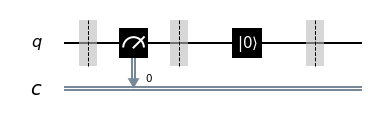

In [5]:
# Eve intercepts all qubits from Alice, measures them with Z and X bases randomly, and resends to Bob.

simulator = Aer.get_backend('qasm_simulator')

circ5 = QuantumCircuit(1,1)  # Z measure
circ5.measure([0],[0])
circ5.barrier(0)

circ6 = QuantumCircuit(1,1)  # X measure
circ6.h(0)
circ6.measure([0],[0])
circ6.barrier(0)

circ7 = QuantumCircuit(1,1)  # Reset (|0>)
circ7.reset(0)
circ7.barrier(0)

#circ7.draw(output='mpl')
measure_circ = [circ5,circ6]


def Eve_measure(measure_circuit,basis,measure_results,resend_circuits):
    measure_circuit = measure_circuit + measure_circ[basis]
    job = execute(measure_circuit, simulator, shots=1)
    result = job.result()
    count = result.get_counts(measure_circuit)
    value = int(list(count)[0])
    measure_results.append(value)
    if not value:
        if not basis:
            measure_circuit = measure_circuit + circ7 # |0>
        else :
            measure_circuit = measure_circuit + circ7 + circ2 # |+>
    else:
        if not basis:
            measure_circuit = measure_circuit + circ7 + circ1 # |1>
        else :
            measure_circuit = measure_circuit + circ7 + circ3 # |->
        
    resend_circuits.append(measure_circuit)


Eve_basis=[]
random_01str(Eve_basis,2*(n+m))
print("Eve_basis :",Eve_basis)

Eve_attack_circuits = []
Eve_measurement_results = [] 

for i in range(2*(n+m)):
    Eve_measure(Alice_step2_circuits[i],Eve_basis[i],Eve_measurement_results,Eve_attack_circuits)
    
print("Eve_measurement_results : ",Eve_measurement_results)
Eve_attack_circuits[0].draw(output='mpl')

Bob_measurement_results :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]


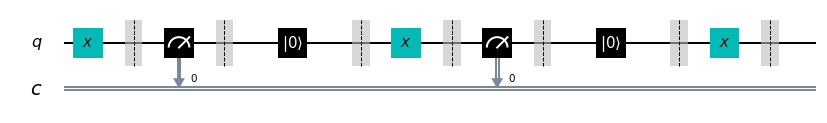

In [6]:
# Step3 : for each qubit of QA Bob receives
#         SA -> Z measure, resend |0> or |1> the same as measurement result
#         SD -> reflect (no any operation or measurement)

def measure_resend(measure_circuit,measure_results,resend_circuits):
    measure_circuit = measure_circuit + circ5
    job = execute(measure_circuit, simulator, shots=1)
    result = job.result()
    count = result.get_counts(measure_circuit)
    value = int(list(count)[0])
    measure_results.append(value)
    if not value:
        measure_circuit = measure_circuit + circ7
    else:
        measure_circuit = measure_circuit + circ7 + circ1
    resend_circuits.append(measure_circuit)


Bob_step3_circuits = [] # QA'
Bob_measurement_results = [] # SK'||Hash(SK)'

for i in range(n+m):
    if not K1[i]: # SD SA
        Bob_step3_circuits.append(Eve_attack_circuits[2*i])
        measure_resend(Eve_attack_circuits[2*i+1],Bob_measurement_results,Bob_step3_circuits)
    else: # SA SD
        measure_resend(Eve_attack_circuits[2*i],Bob_measurement_results,Bob_step3_circuits)
        Bob_step3_circuits.append(Eve_attack_circuits[2*i+1])


print("Bob_measurement_results : ",Bob_measurement_results)
index=0
if not K1[0]: # SD SA
    index=1
Bob_step3_circuits[index].draw(output='mpl')

In [7]:
# Step4 : Alice receives QA'. Z measure SA', Z or X measure SD', and check.
#         Bob checks Hash(SK') == Hash(SK)'.

Alice_step4_SA_circuits = []
Alice_SA_measurement_result = []

Alice_step4_SD_circuits = []
Alice_SD_measurement_result = []

for i in range(n+m):
    if not K1[i]: # SD' SA'
        Alice_step4_SD_circuits.append(Bob_step3_circuits[2*i] + measure_circ[SD_basis[i]])
        Alice_step4_SA_circuits.append(Bob_step3_circuits[2*i+1] + circ5)
    else: # SA' SD'
        Alice_step4_SA_circuits.append(Bob_step3_circuits[2*i] + circ5)
        Alice_step4_SD_circuits.append(Bob_step3_circuits[2*i+1] + measure_circ[SD_basis[i]])


def Alice_measure(measure_circuit,measure_results):
    job = execute(measure_circuit, simulator, shots=1)
    result = job.result()
    count = result.get_counts(measure_circuit)
    value = int(list(count)[0])
    measure_results.append(value)

    
for i in range(n+m):
    Alice_measure(Alice_step4_SA_circuits[i],Alice_SA_measurement_result)
    
for i in range(n+m):
    Alice_measure(Alice_step4_SD_circuits[i],Alice_SD_measurement_result)

print("Alice_SA_measurement_result : ",Alice_SA_measurement_result)
print("Alice_SD_measurement_result : ",Alice_SD_measurement_result)
print()


def Check_result(list1,list2):
    total_count = len(list1)
    error_count = 0
    for i in range(total_count):
        if list1[i]!=list2[i]:
            error_count += 1;
    
    error_rate = (error_count/total_count)*100
    print("error rate : ",error_rate,"%")



if Alice_SA_measurement_result==SA:
    print("Alice's check for SA' is passed.")
else:
    print("Alice's check for SA' is not passed.")
Check_result(Alice_SA_measurement_result,SA)


if Alice_SD_measurement_result==SD:
    print("Alice's check for SD' is passed.")
else:
    print("Alice's check for SD' is not passed.")
Check_result(Alice_SD_measurement_result,SD)
print()


# Bob checks hash value
print("Bob_measurement_results : ",Bob_measurement_results)

Bob_SK=[]
Bob_SK.extend(Bob_measurement_results[0:n])
print("Bob_SK : ",Bob_SK)

Bob_HashSK=[]
Bob_HashSK.extend(Bob_measurement_results[-m:])
print("Bob_HashSK : ",Bob_HashSK)
print()

Bob_SK_hash_value=[]
Hash(Bob_SK,K2,Bob_SK_hash_value)
print("Bob_SK_hash_value : ",Bob_SK_hash_value)
print()

if Bob_SK_hash_value==Bob_HashSK:
    print("Hash(SK') == Hash(SK)'. Bob's check is passed.")
else:
    print("Hash(SK') != Hash(SK)'. Bob's check is not passed.")
Check_result(Bob_SK_hash_value,Bob_HashSK)

Alice_SA_measurement_result :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
Alice_SD_measurement_result :  [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]

Alice's check for SA' is not passed.
error rate :  20.0 %
Alice's check for SD' is not passed.
error rate :  27.500000000000004 %

Bob_measurement_results :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
Bob_SK :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 